In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Step 1: Read the dataset from the CSV
df = pd.read_csv("/content/Student_performance_data _.csv")


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   StudyTimeWeekly   2392 non-null   float64
 1   Absences          2392 non-null   int64  
 2   ParentalSupport   2392 non-null   int64  
 3   GPA               2392 non-null   float64
 4   favourite_colour  2392 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 93.6 KB


In [34]:
# Step 2: Drop the 'Favorite_Color' column (since it's irrelevant for prediction)
df = df.drop('favourite_colour', axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StudyTimeWeekly  2392 non-null   float64
 1   Absences         2392 non-null   int64  
 2   ParentalSupport  2392 non-null   int64  
 3   GPA              2392 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 74.9 KB


In [36]:
# Step 3: Define X (features) and y (target)
X = df[['ParentalSupport', 'Absences', 'StudyTimeWeekly']]  # Selected features
y = df['GPA']  # Target variable

In [37]:
# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
# Step 5: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Step 6: Predict GPA on the test set
y_pred = model.predict(X_test)

In [41]:
# Step 7: Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R² Score: {r2:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

R² Score: 0.92
Mean Squared Error: 0.07


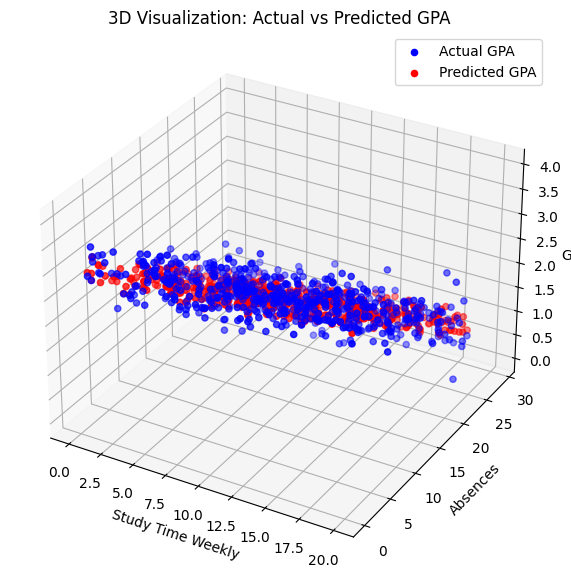

In [43]:
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Create a 3D plot figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Step 2: Scatter plot of the actual data points
ax.scatter(X_test['StudyTimeWeekly'], X_test['Absences'], y_test, color='blue', label='Actual GPA')

# Step 3: Scatter plot of predicted GPA
ax.scatter(X_test['StudyTimeWeekly'], X_test['Absences'], y_pred, color='red', label='Predicted GPA')

# Step 4: Add axis labels
ax.set_xlabel('Study Time Weekly')
ax.set_ylabel('Absences')
ax.set_zlabel('GPA')

# Add legend and show the plot
ax.legend()
plt.title('3D Visualization: Actual vs Predicted GPA')
plt.show()


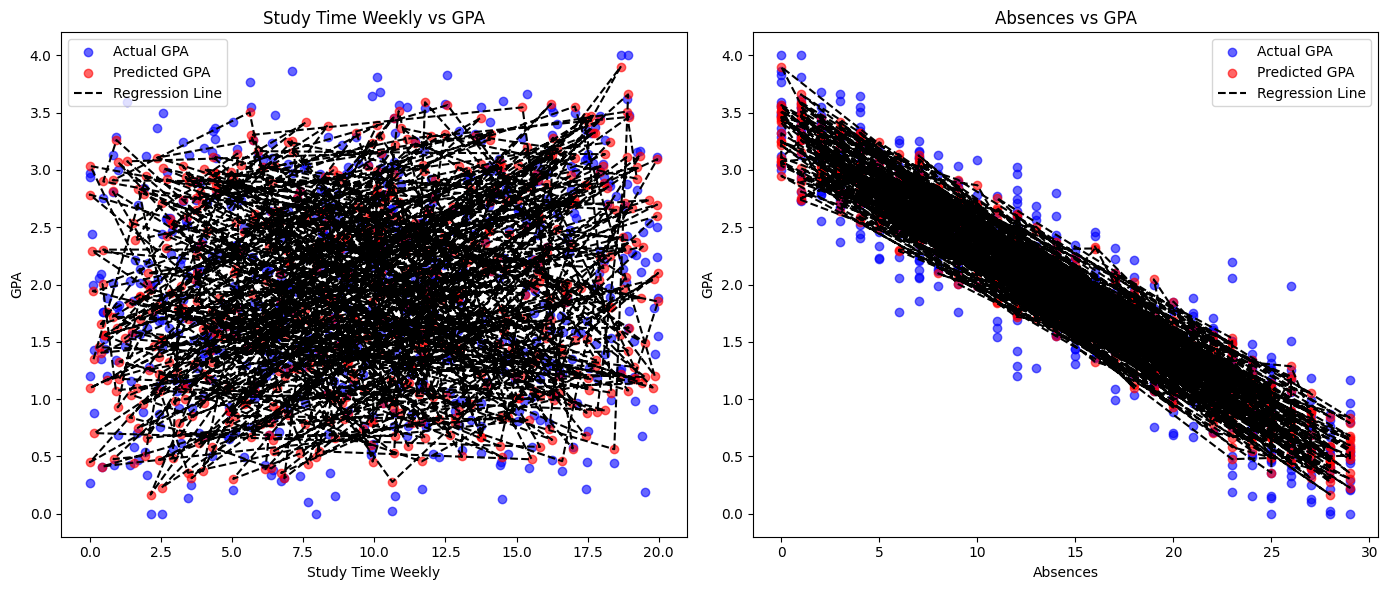

In [44]:
# Step 7: Plot predictions for individual features (2D line plots)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: StudyTimeWeekly vs GPA (while keeping other features fixed)
axes[0].scatter(X_test['StudyTimeWeekly'], y_test, color='blue', label='Actual GPA', alpha=0.6)
axes[0].scatter(X_test['StudyTimeWeekly'], y_pred, color='red', label='Predicted GPA', alpha=0.6)
axes[0].plot(X_test['StudyTimeWeekly'], y_pred, color='black', linestyle='--', label='Regression Line')
axes[0].set_xlabel('Study Time Weekly')
axes[0].set_ylabel('GPA')
axes[0].set_title('Study Time Weekly vs GPA')
axes[0].legend()

# Plot 2: Absences vs GPA (while keeping other features fixed)
axes[1].scatter(X_test['Absences'], y_test, color='blue', label='Actual GPA', alpha=0.6)
axes[1].scatter(X_test['Absences'], y_pred, color='red', label='Predicted GPA', alpha=0.6)
axes[1].plot(X_test['Absences'], y_pred, color='black', linestyle='--', label='Regression Line')
axes[1].set_xlabel('Absences')
axes[1].set_ylabel('GPA')
axes[1].set_title('Absences vs GPA')
axes[1].legend()

# Adjust plot layout and show the plots
plt.tight_layout()
plt.show()